<a href="https://colab.research.google.com/github/vidya-2031/Brainwave_Matrix_Intern/blob/main/HR_Brainwave_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

First 5 rows of the dataset:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905  

In [ ]:

# Step 2: Data Cleaning & Preprocessing (Fixed for HH:MM format)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Time' column to datetime.time format (automatically detects format)
df['Time'] = pd.to_datetime(df['Time']).dt.time

# Extract day and month names
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

# Extract hour from time using datetime parsing again
df['Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour

# Display the updated DataFrame columns
print("Updated DataFrame with new columns:")
print(df[['Date', 'Time', 'Day', 'Month', 'Hour']].head())

Updated DataFrame with new columns:
        Date      Time       Day     Month  Hour
0 2019-01-05  13:08:00  Saturday   January    13
1 2019-03-08  10:29:00    Friday     March    10
2 2019-03-03  13:23:00    Sunday     March    13
3 2019-01-27  20:33:00    Sunday   January    20
4 2019-02-08  10:37:00    Friday  February    10


<ipython-input-5-47d354cb35cc>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time
<ipython-input-5-47d354cb35cc>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour


<ipython-input-30-395c5dd2d766>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Branch', y='Total', estimator=np.sum, palette='viridis')


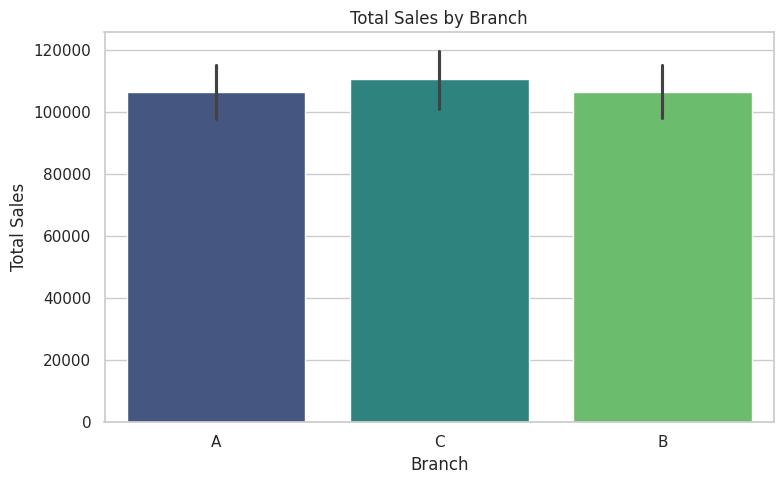

<ipython-input-30-395c5dd2d766>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Product line', y='Total', estimator=np.sum, palette='magma')


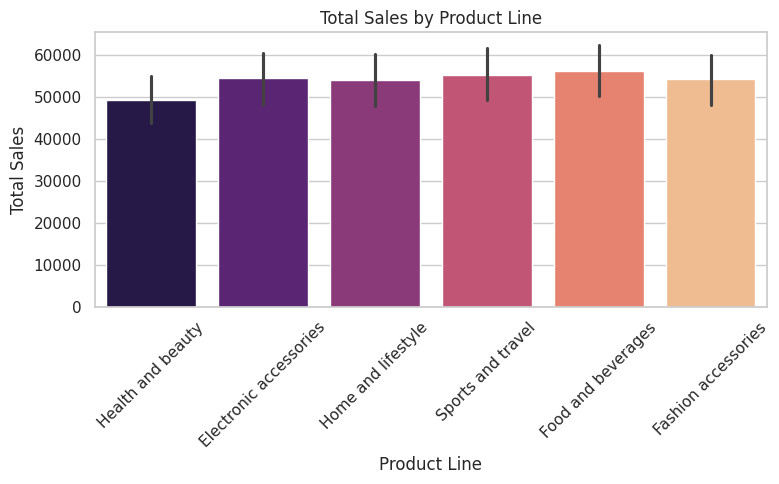

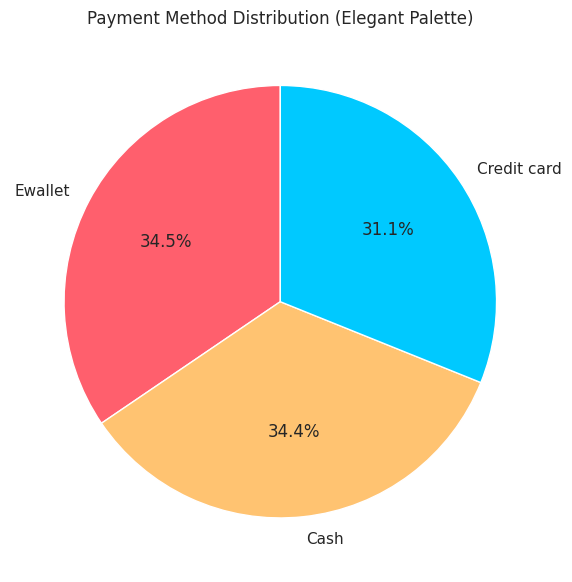

<ipython-input-30-395c5dd2d766>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='City', y='gross income', estimator=np.sum, palette='Set2')


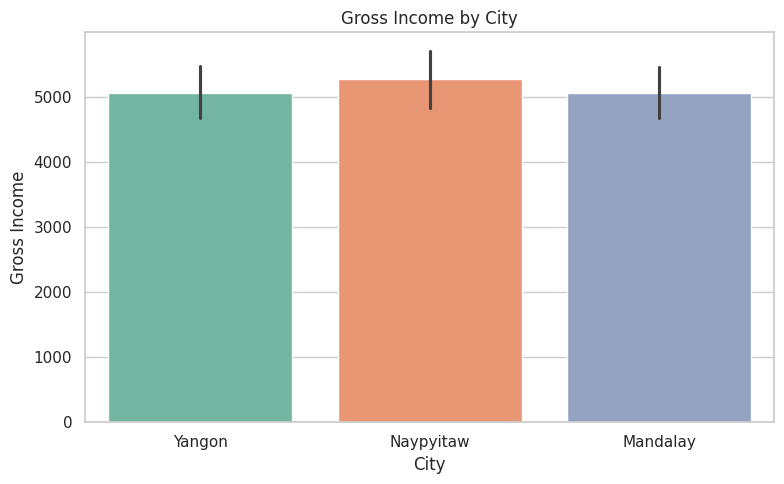

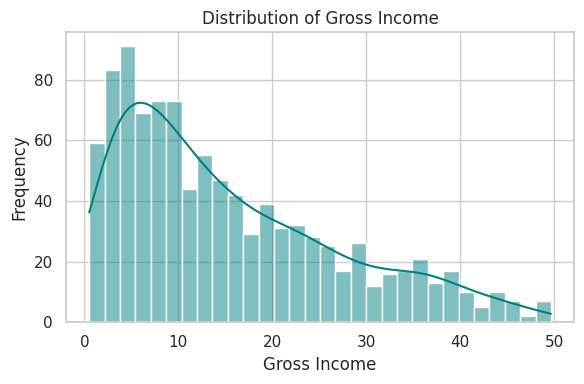

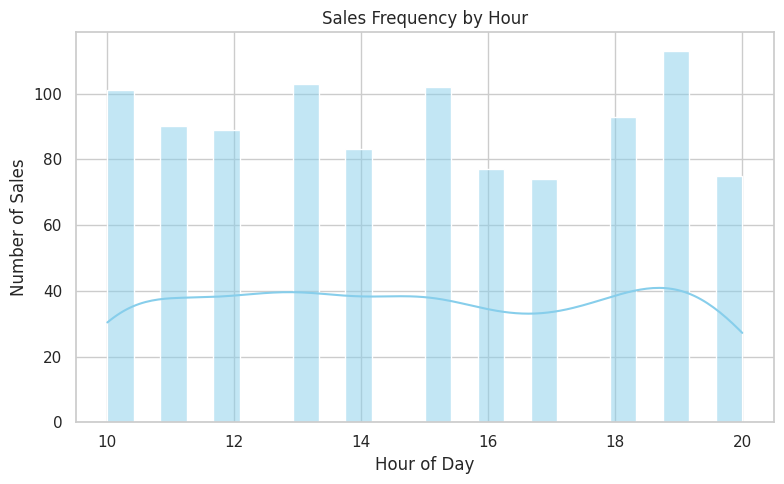

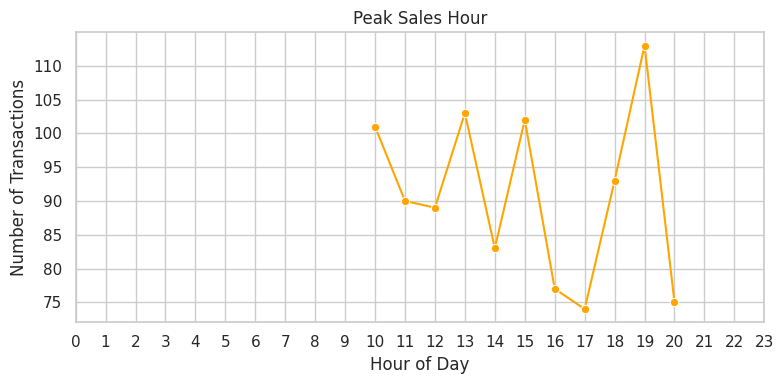

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# 1. Total Sales by Branch
plt.figure()
sns.barplot(data=df, x='Branch', y='Total', estimator=np.sum, palette='viridis')
plt.title('Total Sales by Branch')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 2. Sales by Product Line
plt.figure()
sns.barplot(data=df, x='Product line', y='Total', estimator=np.sum, palette='magma')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Pie Chart - Elegant & Professional Colors
plt.figure(figsize=(6,6))
payment_counts = df['Payment'].value_counts()
colors = ['#FF5F6D', '#FFC371', '#00C9FF']
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors)
plt.title('Payment Method Distribution (Elegant Palette)')
plt.tight_layout()
plt.show()


# 4. Gross Income by City
plt.figure()
sns.barplot(data=df, x='City', y='gross income', estimator=np.sum, palette='Set2')
plt.title('Gross Income by City')
plt.ylabel('Gross Income')
plt.tight_layout()
plt.show()

# 5. Gross Income Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['gross income'], bins=30, kde=True, color='teal')
plt.title('Distribution of Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6. Sales Frequency by Hour
plt.figure()
sns.histplot(data=df, x='Hour', bins=24, kde=True, color='skyblue')
plt.title('Sales Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()

# 7. Peak Sales Hour (fixed)
plt.figure(figsize=(8,4))
hourly_sales = df['Hour'].value_counts().sort_index()
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', color='orange')
plt.title('Peak Sales Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [ ]:

# Step 4: KPI Calculation

# 1. Total Revenue
total_revenue = df['Total'].sum()

# 2. Average Transaction Value
average_transaction = df['Total'].mean()

# 3. Total Gross Income
total_gross_income = df['gross income'].sum()

# 4. Most Popular Product Line
popular_product = df['Product line'].value_counts().idxmax()

# 5. Branch with Highest Revenue
top_branch = df.groupby('Branch')['Total'].sum().idxmax()

# 6. Peak Sales Hour
peak_hour = df['Hour'].value_counts().idxmax()

# Display KPI results
print("----- KEY PERFORMANCE INDICATORS (KPI) -----")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Transaction Value: ${average_transaction:,.2f}")
print(f"Total Gross Income: ${total_gross_income:,.2f}")
print(f"Most Popular Product Line: {popular_product}")
print(f"Top Performing Branch: Branch {top_branch}")
print(f"Peak Sales Hour: {peak_hour}:00")

----- KEY PERFORMANCE INDICATORS (KPI) -----
Total Revenue: $322,966.75
Average Transaction Value: $322.97
Total Gross Income: $15,379.37
Most Popular Product Line: Fashion accessories
Top Performing Branch: Branch C
Peak Sales Hour: 19:00
